In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_tesla = pd.read_csv("Dataset/TSLA.csv",index_col=["Date"])

In [3]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000
2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500
2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500
2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000
2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000,122391000
...,...,...,...,...,...,...
2022-09-12,300.720001,305.489990,300.399994,304.420013,304.420013,48674600
2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600
2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700


# Data Visualization

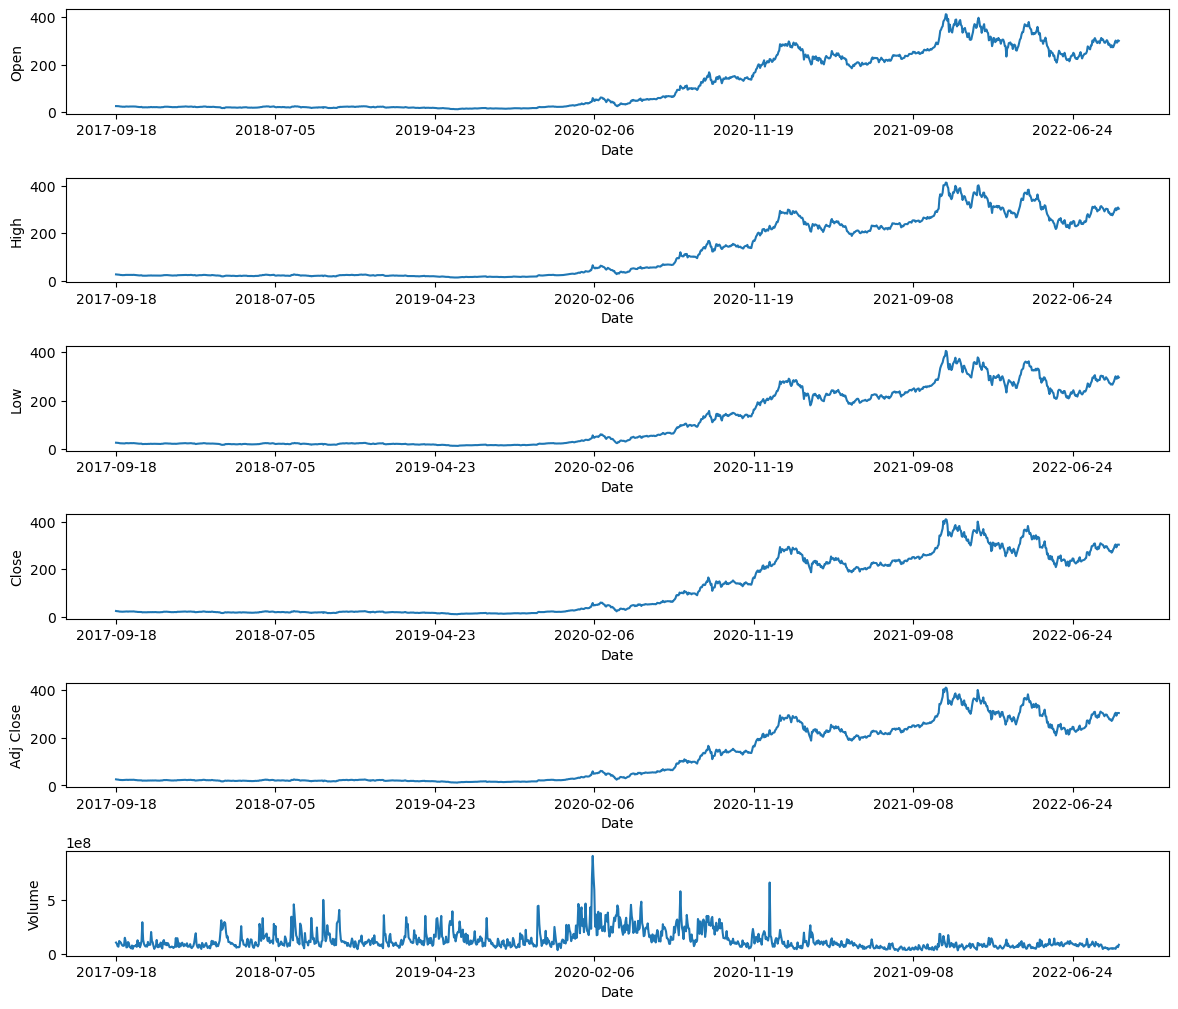

In [4]:
plt.figure(figsize=(12,10))
for i,j in enumerate(df_tesla.columns):
    plt.subplot(6,1,i+1)
    plt.tight_layout()
    plt.ylabel(j)
    df_tesla[j].plot( )

<Axes: xlabel='Date'>

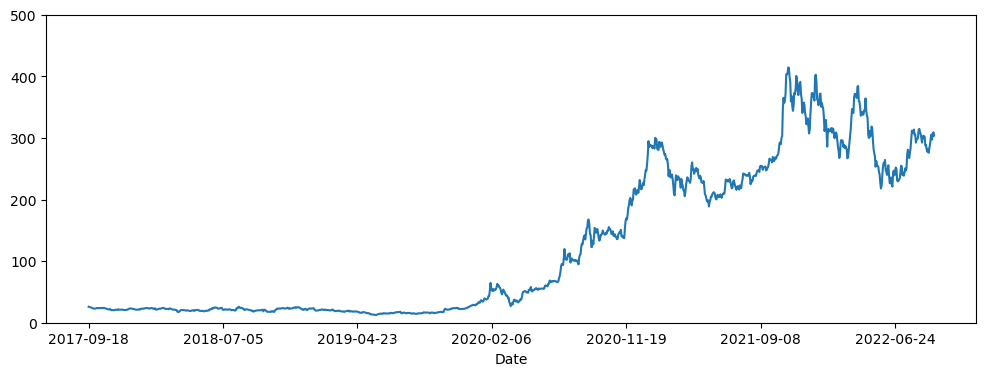

In [5]:
df_tesla["High"].plot(ylim=[0,500],figsize=(12,4))

In [6]:
df_tesla.loc['2017-09-18':'2017-09-21']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000
2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500
2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500
2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000


In [7]:
df_tesla.iloc[0:4]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000
2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500
2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500
2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000


In [8]:
df_tesla.iloc[4:8]["Close"]

Date
2017-09-22    23.406000
2017-09-25    22.999332
2017-09-26    23.016666
2017-09-27    22.731333
Name: Close, dtype: float64

#### Plotting data of specific interval

Plot the graph for each feature between the year 2020-21

Feature: Open

In [9]:
data_open = df_tesla['Open'].loc["2020-01-01":"2020-12-01"]
data_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2020-11-24    180.133331
2020-11-25    183.353333
2020-11-27    193.720001
2020-11-30    200.736664
2020-12-01    199.196671
Name: Open, Length: 232, dtype: float64

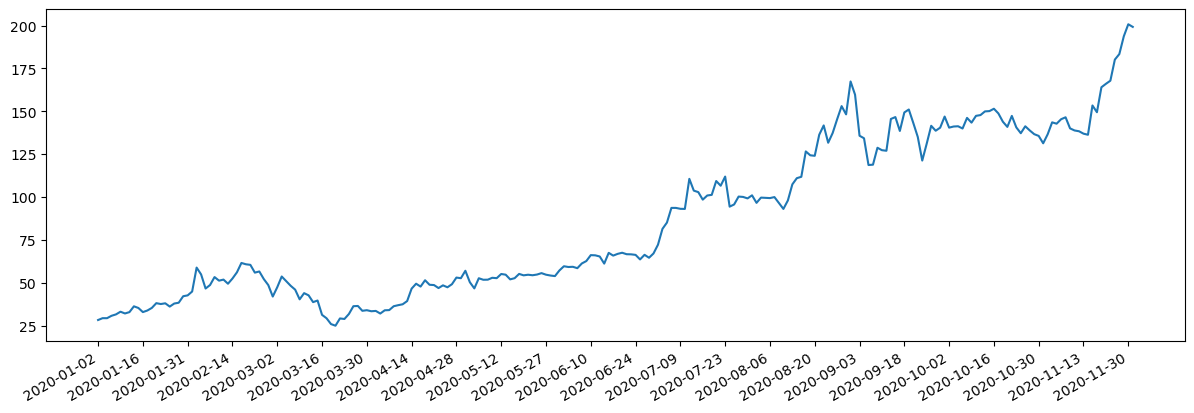

In [10]:
figure,axis = plt.subplots(1,figsize=(12,4))
figure.autofmt_xdate()
figure.tight_layout()
axis.plot(data_open.index.values,data_open.values)
x_sticks = list(data_open.index[0::10].values)
axis.set_xticks(x_sticks)
plt.show()

# Data Preprocessing

### Outlier Detection

In [11]:
import seaborn as sns

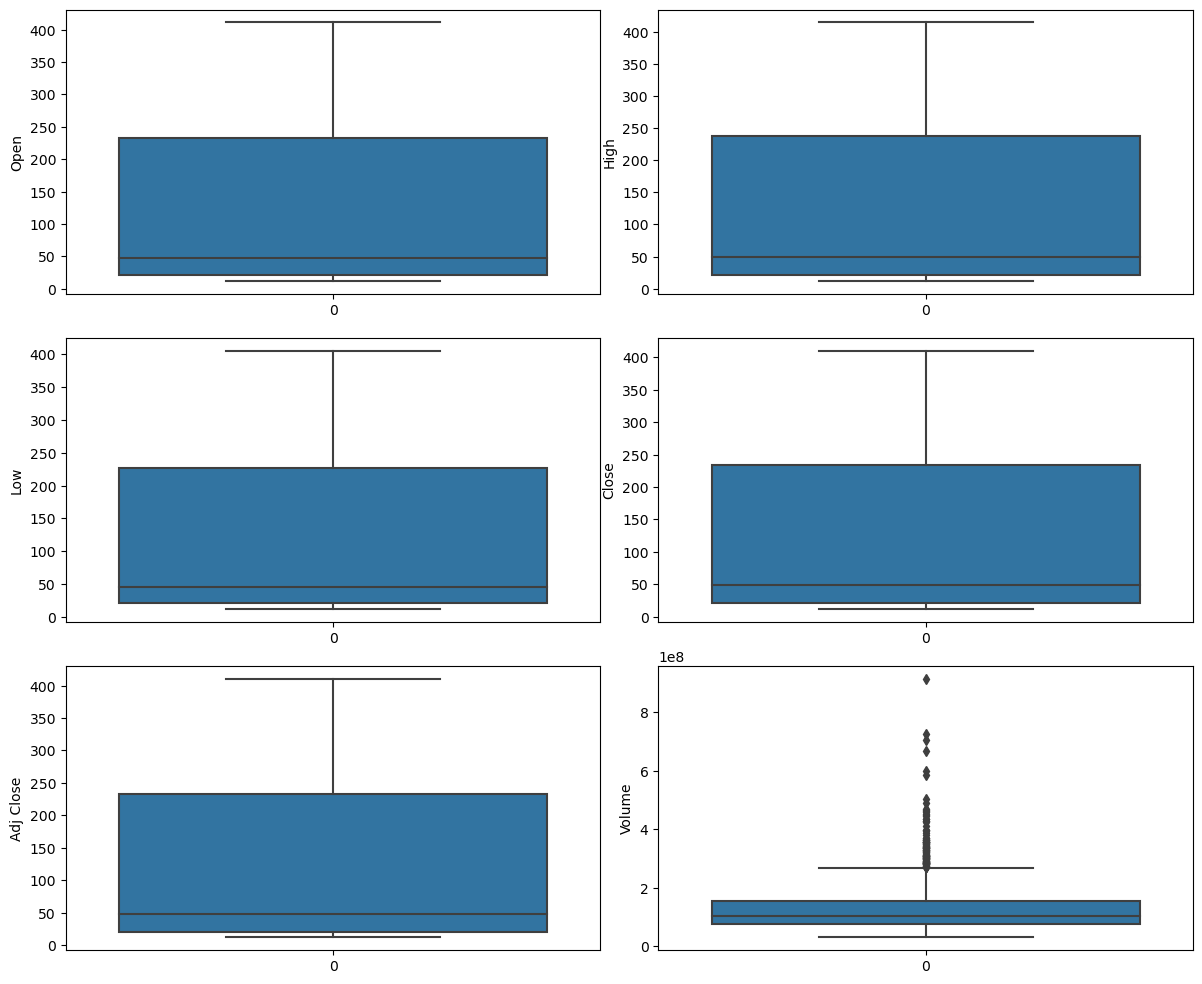

In [12]:
figure,axis = plt.subplots(3,2,figsize=(12,10))
plt.tight_layout()

sns.boxplot(data=df_tesla["Open"],ax=axis[0][0])
axis[0][0].set_ylabel("Open")

sns.boxplot(data=df_tesla["High"],ax=axis[0][1])
axis[0][1].set_ylabel("High")

sns.boxplot(data=df_tesla["Low"],ax=axis[1][0])
axis[1][0].set_ylabel("Low")

sns.boxplot(data=df_tesla["Close"],ax=axis[1][1])
axis[1][1].set_ylabel("Close")

sns.boxplot(data=df_tesla["Adj Close"],ax=axis[2][0])
axis[2][0].set_ylabel("Adj Close")

sns.boxplot(data=df_tesla["Volume"],ax=axis[2][1])
axis[2][1].set_ylabel("Volume")

plt.show()

from the above its seen that feature Volume have outliers

In [13]:
df_tesla['Volume'].describe()

count    1.259000e+03
mean     1.320049e+08
std      9.025711e+07
min      2.940180e+07
25%      7.542375e+07
50%      1.016115e+08
75%      1.526895e+08
max      9.140820e+08
Name: Volume, dtype: float64

In [14]:
q1 = df_tesla['Volume'].quantile(0.25)
q3 = df_tesla["Volume"].quantile(0.75)
iqr = q3 - q1

In [15]:
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)

print("Lower_limit:",lower_limit)
print("Upper_limit:",upper_limit)

Lower_limit: -40474875.0
Upper_limit: 268588125.0


In [16]:
df_tesla['Volume'][df_tesla['Volume'] > upper_limit] = upper_limit

C:\Users\Gokulnath\AppData\Local\Temp\ipykernel_5960\1345278722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tesla['Volume'][df_tesla['Volume'] > upper_limit] = upper_limit


In [17]:
df_tesla['Volume'][df_tesla['Volume'] < lower_limit]

Series([], Name: Volume, dtype: int64)

After capping the outliers

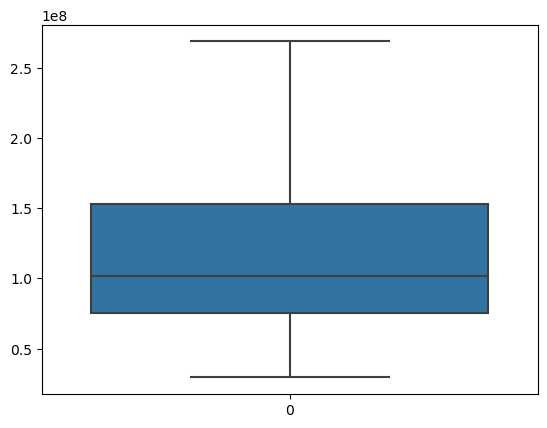

In [18]:
sns.boxplot(data=df_tesla['Volume'])
plt.show()

Chronological order and Equidistant timestamp check


In [19]:
df = df_tesla.reset_index()
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2022-09-12,300.720001,305.489990,300.399994,304.420013,304.420013,48674600
1255,2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600
1256,2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700
1257,2022-09-15,301.829987,309.119995,300.720001,303.750000,303.750000,64795500
1258,2022-09-16,299.609985,303.709991,295.600006,303.350006,303.350006,86949500


The chronological order can be achieved by sorting the dataframe by the timestamps

In [21]:
df = df.sort_values(by='Date')

Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data.

In [22]:
df['check'] = df['Date'] - df['Date'].shift(1)

In [23]:
missing_days = df['check'][1:].dt.days.astype('int16').sum() - df['check'].count()

Number of missing days in the timestamp

In [24]:
missing_days

566

Imputing Missing Dates in Daily Data

In [25]:
imputed_df = df.set_index("Date")

In [26]:
start = imputed_df.index[0]
end = imputed_df.index[len(imputed_df.index)-1]

In [27]:
new_date = pd.date_range(start,end,freq="D")

In [28]:
imputed_df = imputed_df.reindex(new_date)

In [29]:
imputed_df.rename_axis('date',inplace=True)

In [30]:
imputed_df.drop(columns='check',inplace=True)

In [31]:
imputed_df

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000.0
2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500.0
2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500.0
2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000.0
2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000,122391000.0
...,...,...,...,...,...,...
2022-09-12,300.720001,305.489990,300.399994,304.420013,304.420013,48674600.0
2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600.0
2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700.0


### Handling Missing Value

In [32]:
imputed_df.isnull().sum()

Open         566
High         566
Low          566
Close        566
Adj Close    566
Volume       566
dtype: int64

Fill NaN with Linearly Interpolated Value with .interpolate()

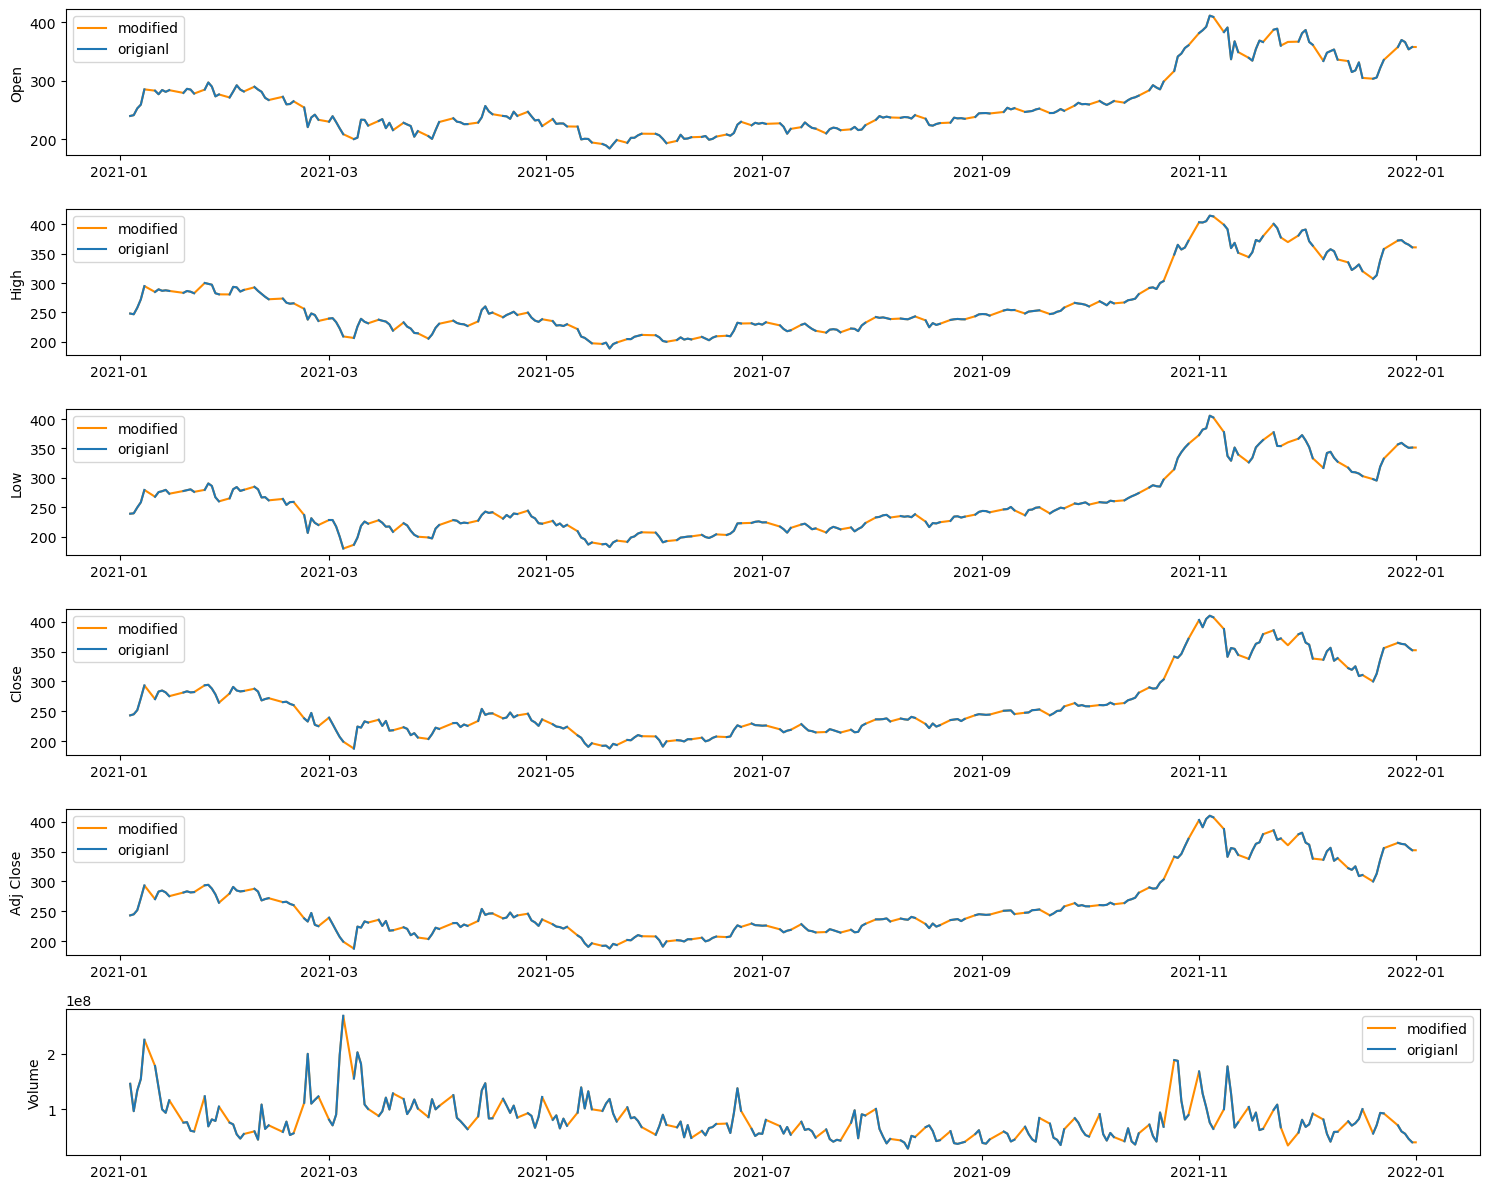

In [33]:
plt.figure(figsize=(15,12))
for i,j in enumerate(imputed_df.columns):
    plt.subplot(6,1,i+1)
    plt.plot(imputed_df[j].loc['2021-01-01':'2022-01-01'].index.values,imputed_df[j].loc['2021-01-01':'2022-01-01'].interpolate().values,color='darkorange')
    plt.plot(imputed_df[j].loc['2021-01-01':'2022-01-01'].index.values,imputed_df[j].loc['2021-01-01':'2022-01-01'].values)
    plt.legend(['modified','origianl'])
    plt.ylabel(j)
    plt.tight_layout()
plt.show()  

In [34]:
imputed_df.interpolate(inplace=True)

### Smoothing or Resampling data

In [35]:
resampled_data = imputed_df.copy()

Downsampling for weekend frequency

In [36]:
resampled_data = resampled_data.resample('7D').mean()

In [37]:
resampled_data

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2017-09-18,24.707429,24.993810,24.109238,24.263428,24.263428,1.009326e+08
2017-09-25,23.048572,23.200095,22.594191,22.805142,22.805142,8.923521e+07
2017-10-02,23.252572,23.621524,22.999143,23.397238,23.397238,9.399493e+07
2017-10-09,23.533429,23.773524,23.300095,23.529047,23.529047,7.610679e+07
2017-10-16,23.537714,23.713333,23.090381,23.286000,23.286000,7.345243e+07
...,...,...,...,...,...,...
2022-08-15,301.823334,305.296661,296.756666,300.856663,300.856663,6.748513e+07
2022-08-22,294.425707,298.510472,288.280003,291.504765,291.504765,5.521577e+07
2022-08-29,280.116782,282.475713,270.863566,275.582500,275.582500,5.069832e+07


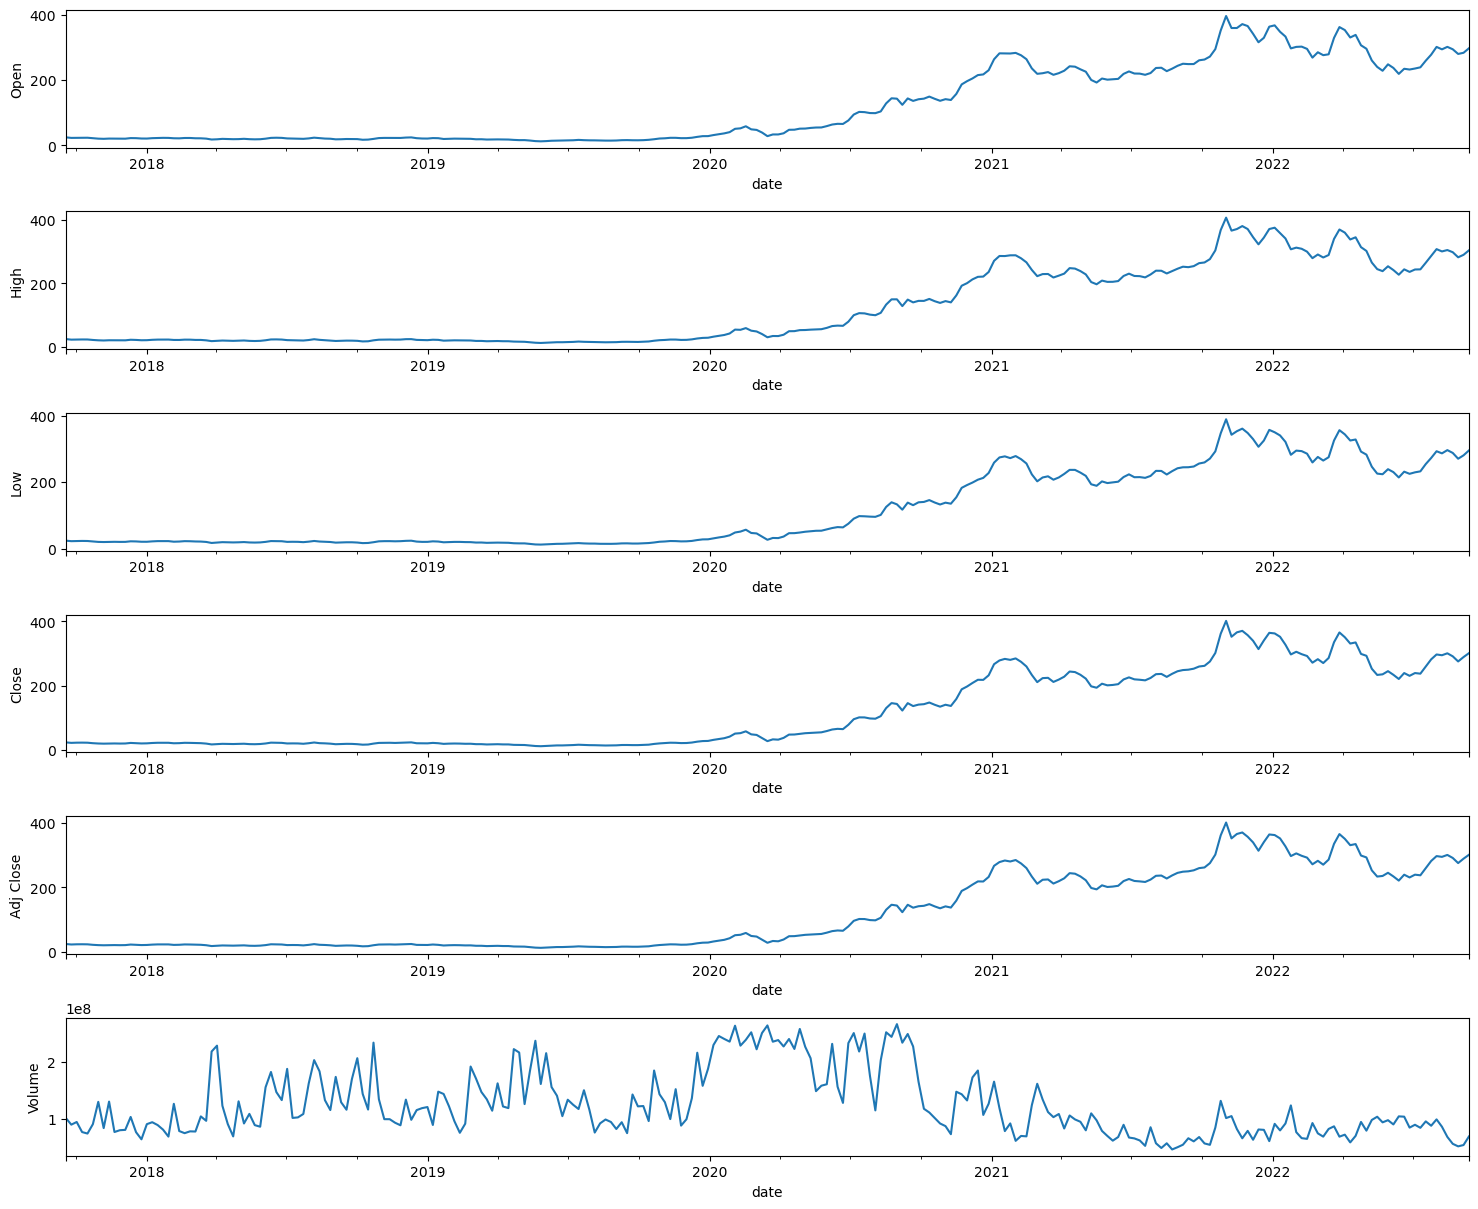

In [38]:
plt.figure(figsize=(15,12))
for i,j in enumerate(resampled_data.columns):
    plt.subplot(6,1,i+1)
    plt.tight_layout()
    plt.ylabel(j)
    resampled_data[j].plot( )

### Testing for stationarity

**Rolling statistics**   
In rolling statistics technique we define a size of window to calculate the mean and standard deviation throughout the series. For stationary series mean and standard deviation shouldn't change with time.

Stationarity check for volume feature